In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,Normalizer
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'gas_turbines.csv')

In [10]:
df

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [11]:
df.columns

Index(['AT', 'AP', 'AH', 'TEY'], dtype='object')

In [12]:
df=df.drop(['AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO', 'NOX'],axis=1)
df

KeyError: "['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'] not found in axis"

In [13]:
X=df.drop('TEY',axis=1)
X=keras.utils.normalize(X.values)
X

array([[0.00677431, 0.99539695, 0.0955982 ],
       [0.00669734, 0.99537198, 0.09586328],
       [0.00680666, 0.99548518, 0.09467273],
       ...,
       [0.007184  , 0.99512192, 0.09839079],
       [0.00692511, 0.99517562, 0.09786487],
       [0.00684619, 0.99532081, 0.09638267]])

In [74]:
Y=df[['TEY']]
Y=keras.utils.normalize(Y.values)
[[Y]]

[[array([[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]])]]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=30)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11279, 3), (3760, 3), (11279, 1), (3760, 1))

In [93]:
model=Sequential()

In [94]:
model.add(Dense(4,activation='relu',input_shape=(3,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 16        
                                                                 
 dense_21 (Dense)            (None, 8)                 40        
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
opt=keras.optimizers.Adam(learning_rate=0.003)

In [96]:
model.compile(optimizer=opt,loss='mse',metrics=['mse'])

In [97]:
history=model.fit(x_train,y_train,epochs=80,batch_size=500,validation_data=(x_test,y_test))

Epoch 1/80
23/23 [==============================] - 1s 12ms/step - loss: 2.8391 - mse: 2.8391 - val_loss: 1.7028 - val_mse: 1.7028
Epoch 2/80
23/23 [==============================] - 0s 5ms/step - loss: 1.1616 - mse: 1.1616 - val_loss: 0.7150 - val_mse: 0.7150
Epoch 3/80
23/23 [==============================] - 0s 5ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 0.3535 - val_mse: 0.3535
Epoch 4/80
23/23 [==============================] - 0s 5ms/step - loss: 0.2536 - mse: 0.2536 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 5/80
23/23 [==============================] - 0s 5ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6/80
23/23 [==============================] - 0s 5ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 1.3602e-04 - val_mse: 1.3602e-04
Epoch 7/80
23/23 [==============================] - 0s 5ms/step - loss: 2.5384e-04 - mse: 2.5384e-04 - val_loss: 4.4272e-05 - val_mse: 4.4272e-05
Epoch 8/80
23/23 [==============================] - 0s 5ms/step -

23/23 [==============================] - 0s 6ms/step - loss: 3.2879e-05 - mse: 3.2879e-05 - val_loss: 3.3792e-05 - val_mse: 3.3792e-05
Epoch 58/80
23/23 [==============================] - 0s 7ms/step - loss: 3.2635e-05 - mse: 3.2635e-05 - val_loss: 3.3524e-05 - val_mse: 3.3524e-05
Epoch 59/80
23/23 [==============================] - 0s 5ms/step - loss: 3.2401e-05 - mse: 3.2401e-05 - val_loss: 3.3285e-05 - val_mse: 3.3285e-05
Epoch 60/80
23/23 [==============================] - 0s 7ms/step - loss: 3.2149e-05 - mse: 3.2149e-05 - val_loss: 3.3035e-05 - val_mse: 3.3035e-05
Epoch 61/80
23/23 [==============================] - 0s 7ms/step - loss: 3.1934e-05 - mse: 3.1934e-05 - val_loss: 3.2853e-05 - val_mse: 3.2853e-05
Epoch 62/80
23/23 [==============================] - 0s 5ms/step - loss: 3.1698e-05 - mse: 3.1698e-05 - val_loss: 3.2574e-05 - val_mse: 3.2574e-05
Epoch 63/80
23/23 [==============================] - 0s 7ms/step - loss: 3.1462e-05 - mse: 3.1462e-05 - val_loss: 3.2364e-05 - val

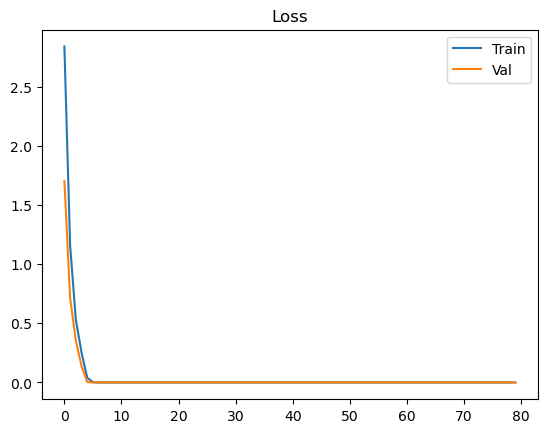

In [98]:
plt.plot(range(80),history.history['loss'],label='Train')
plt.plot(range(80),history.history['val_loss'],label='Val')
plt.title('Loss')
plt.legend()

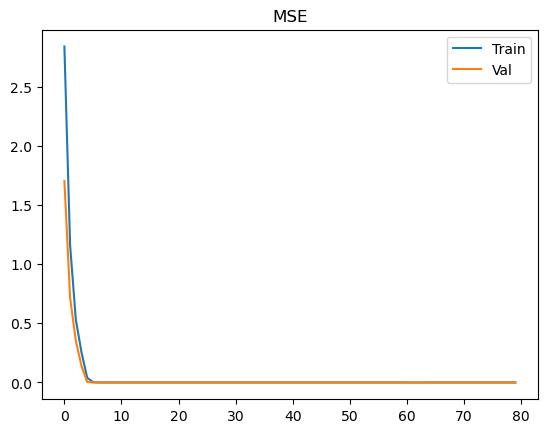

In [99]:
plt.plot(range(80),history.history['mse'],label='Train')
plt.plot(range(80),history.history['val_mse'],label='Val')
plt.title('MSE')
plt.legend()

In [72]:
y_pred=model.predict(x_test).flatten()
y_pred

118/118 [==============================] - 0s 2ms/step


array([0.9999996, 0.9999996, 0.9999996, ..., 0.9999996, 0.9999996,
       0.9999996], dtype=float32)

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.384185791015625e-06

In [53]:
model.evaluate(x_train, y_train)

353/353 [==============================] - 1s 2ms/step - loss: 5.6843e-12 - mse: 5.6843e-12


[5.6843418860808015e-12, 5.6843418860808015e-12]